# Using Only ReLU to Perfectly Classify the Given Data

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the data given (x1, x2, d)
x1 = np.array([1, 0, -1, 0, 0.5, -0.5, 0.5, -0.5])
x2 = np.array([0, 1, 0, -1, 0.5, 0.5, -0.5, -0.5])
d = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# Defining hyperparameters
learning_rate = 0.01
epochs = 100
hidden_size = 15
batch_size = 8
weight_decay = 0.001

# Initialize weights and biases
np.random.seed(0)
input_size = 2
output_size = 1

weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
bias_output = np.zeros((1, output_size))

In [3]:
# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative for back propagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [4]:
# Main training loop
for epoch in range(epochs):
    # Shuffling the data --> batch training
    indices = np.arange(len(x1))
    np.random.shuffle(indices)
    x1_shuffled = x1[indices]
    x2_shuffled = x2[indices]
    d_shuffled = d[indices]

    # Mini-batch training
    for batch_start in range(0, len(x1), batch_size):
        batch_end = batch_start + batch_size
        x1_batch = x1_shuffled[batch_start:batch_end]
        x2_batch = x2_shuffled[batch_start:batch_end]
        d_batch = d_shuffled[batch_start:batch_end]

        # Forward pass
        input_layer = np.column_stack((x1_batch, x2_batch))
        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = relu(output_layer_input)  # Binary classification
        # print(f"Predicted Output: {predicted_output}")

        # Cross-entropy loss
        error = -d_batch.reshape(-1, 1) * np.log(predicted_output) - (1 - d_batch.reshape(-1, 1)) * np.log(1 - predicted_output)
        loss = np.mean(error)
        # print(f"Error: {error}, Loss: {loss}")

        # L2 regularization
        l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

        # Total loss with regularization
        total_loss = loss + l2_regularization
        # print(f"Loss after L2-Regularization: {total_loss}")

        # Backpropagation
        delta_output = predicted_output - d_batch.reshape(-1, 1)
        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output -= hidden_layer_output.T.dot(delta_output) * learning_rate + weight_decay * weights_hidden_output
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden -= input_layer.T.dot(delta_hidden) * learning_rate + weight_decay * weights_input_hidden
        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    # Logging the loss
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

Epoch 100/100, Loss: 0.4974


In [5]:
# Testing the trained network
test_data = np.column_stack((x1, x2))
test_hidden_input = np.dot(test_data, weights_input_hidden) + bias_hidden
test_hidden_output = relu(test_hidden_input)
test_output_input = np.dot(test_hidden_output, weights_hidden_output) + bias_output
test_predicted_output = relu(test_output_input)  # Binary classification

# Implementing a threshold of 0.5 (binary classification)
prediction = (test_predicted_output >= 0.5).astype(int).flatten()
print("Expected Outputs:", d)
print("Predicted Outputs:", prediction)

Expected Outputs: [1 1 1 1 0 0 0 0]
Predicted Outputs: [1 1 1 1 0 0 0 0]


# ---------------- ABOVE IS FROM HOMEWORK 2 -------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.shape[1])
print(len(np.unique(y_train)))

(124, 13)
13
3


# Initial Wine Dataset Classification Method

Epoch 100/250, Loss: 0.0292
Epoch 200/250, Loss: 0.0296

Hidden Layer Size: 32, Learning Rate: 0.01, Weight Decay: 0.001, Batch Size: 32
Final Training Accuracy: 1.0
Confusion Matrix (Training):
 [[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
Final Test Accuracy: 0.9814814814814815
Confusion Matrix (Test):
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


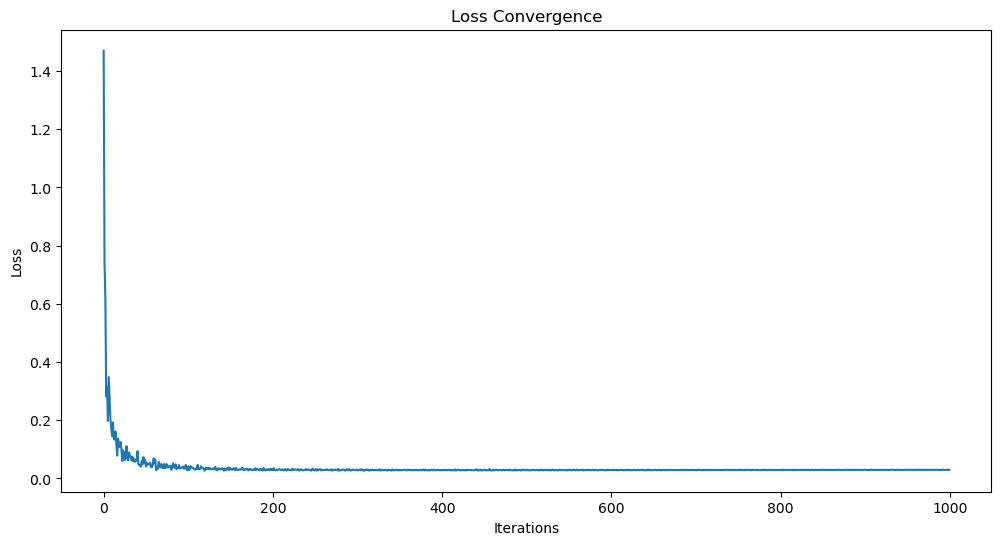

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 32
output_size = len(np.unique(y_train))
learning_rate = 0.01
epochs = 250
weight_decay = 0.001
batch_size = 32  # Mini-batch size

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop
loss_history = []
for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass
        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
        hidden_output = relu(hidden_input)
        output = np.dot(hidden_output, weights_hidden_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1
        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

        # Update weights and biases
        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

# Calculate final accuracy on the training set
hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
hidden_output = relu(hidden_input)
output = np.dot(hidden_output, weights_hidden_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_train, predicted_labels)
confusion = confusion_matrix(y_train, predicted_labels)

print(f"\nHidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
print("Final Training Accuracy:", accuracy)
print("Confusion Matrix (Training):\n", confusion)

# Test the model on the test set
hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_output = relu(hidden_input)
output = np.dot(hidden_output, weights_hidden_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output)
prediction = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(prediction, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

print("Final Test Accuracy:", accuracy)
print("Confusion Matrix (Test):\n", confusion)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Testing Multiple Hyperparameters

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
input_size = X_train.shape[1]
hidden_sizes = [8, 16, 32, 64, 128]
output_size = len(np.unique(y_train))
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = [100, 1000, 10000]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16, 32, 64]  # Mini-batch size

# # Initialize weights and biases
# np.random.seed(0)
# weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
# bias_hidden = np.zeros((1, hidden_size))
# weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
# bias_output = np.zeros((1, output_size))

# # ReLU activation function and its derivative
# def relu(x):
#     return np.maximum(0, x)

# def relu_derivative(x):
#     return np.where(x > 0, 1, 0)

# Training loop
loss_history = []
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)
                
                for epoch in epochs:
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the training set
                hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_train, predicted_labels)
                confusion = confusion_matrix(y_train, predicted_labels)

                print("Final Training Accuracy:", accuracy)
                print("Confusion Matrix (Training):\n", confusion)

                # Test the model on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)

                print("Final Test Accuracy:", accuracy)
                print("Confusion Matrix (Test):\n", confusion)

Hidden Layer Size: 8, Learning Rate: 0.0001, Weight Decay: 0.0001, Batch Size: 8
Final Training Accuracy: 0.33064516129032256
Confusion Matrix (Training):
 [[13  2 25]
 [17 28  5]
 [ 0 34  0]]
Final Test Accuracy: 0.2777777777777778
Confusion Matrix (Test):
 [[ 4  1 14]
 [ 7 11  3]
 [ 0 14  0]]
Hidden Layer Size: 8, Learning Rate: 0.0001, Weight Decay: 0.0001, Batch Size: 16
Final Training Accuracy: 0.33064516129032256
Confusion Matrix (Training):
 [[13  2 25]
 [17 28  5]
 [ 0 34  0]]
Final Test Accuracy: 0.2777777777777778
Confusion Matrix (Test):
 [[ 4  1 14]
 [ 7 11  3]
 [ 0 14  0]]
Hidden Layer Size: 8, Learning Rate: 0.0001, Weight Decay: 0.0001, Batch Size: 32
Final Training Accuracy: 0.33064516129032256
Confusion Matrix (Training):
 [[13  2 25]
 [17 28  5]
 [ 0 34  0]]
Final Test Accuracy: 0.2777777777777778
Confusion Matrix (Test):
 [[ 4  1 14]
 [ 7 11  3]
 [ 0 14  0]]
Hidden Layer Size: 8, Learning Rate: 0.0001, Weight Decay: 0.0001, Batch Size: 64
Final Training Accuracy: 0.3

# Testing Plotting Results (Hidden Layer Size = 8)

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0027
Epoch 200/1000, Loss: 0.0025
Epoch 300/1000, Loss: 0.0025
Epoch 400/1000, Loss: 0.0025
Epoch 500/1000, Loss: 0.0026
Epoch 600/1000, Loss: 0.0026
Epoch 700/1000, Loss: 0.0027
Epoch 800/1000, Loss: 0.0027
Epoch 900/1000, Loss: 0.0027
Epoch 1000/1000, Loss: 0.0027
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0027
Epoch 200/1000, Loss: 0.0025
Epoch 300/1000, Loss: 0.0027
Epoch 400/1000, Loss: 0.0027
Epoch 500/1000, Loss: 0.0027
Epoch 600/1000, Loss: 0.0028
Epoch 700/1000, Loss: 0.0028
Epoch 800/1000, Loss: 0.0028
Epoch 900/1000, Loss: 0.0029
Epoch 1000/1000, Loss: 0.0029
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Deca

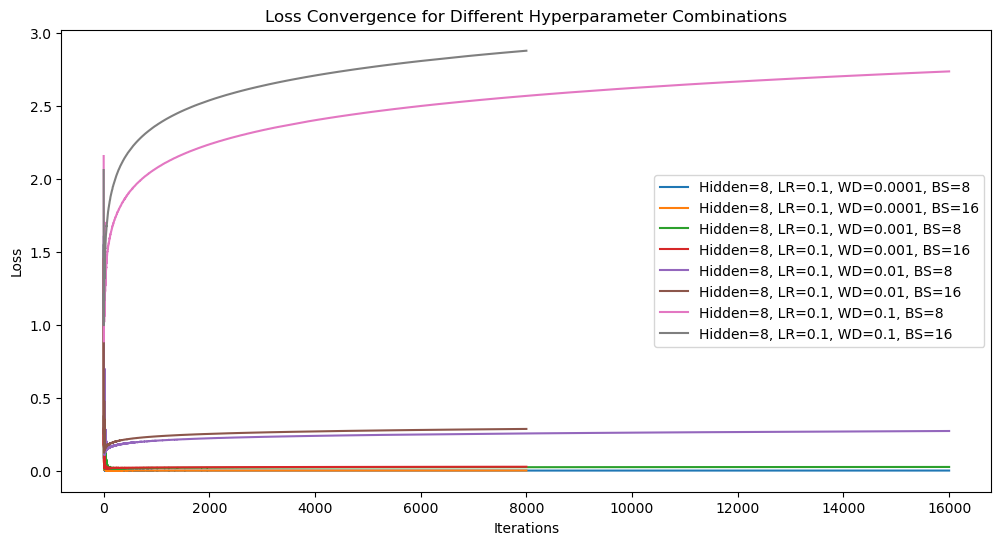

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [8]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0046
Epoch 200/1000, Loss: 0.0045
Epoch 300/1000, Loss: 0.0047
Epoch 400/1000, Loss: 0.0049
Epoch 500/1000, Loss: 0.0051
Epoch 600/1000, Loss: 0.0053
Epoch 700/1000, Loss: 0.0056
Epoch 800/1000, Loss: 0.0056
Epoch 900/1000, Loss: 0.0057
Epoch 1000/1000, Loss: 0.0057
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0049
Epoch 200/1000, Loss: 0.0050
Epoch 300/1000, Loss: 0.0055
Epoch 400/1000, Loss: 0.0057
Epoch 500/1000, Loss: 0.0059
Epoch 600/1000, Loss: 0.0062
Epoch 700/1000, Loss: 0.0064
Epoch 800/1000, Loss: 0.0065
Epoch 900/1000, Loss: 0.0066
Epoch 1000/1000, Loss: 0.0068
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 8, Learning Rate: 0.1, Weight Deca

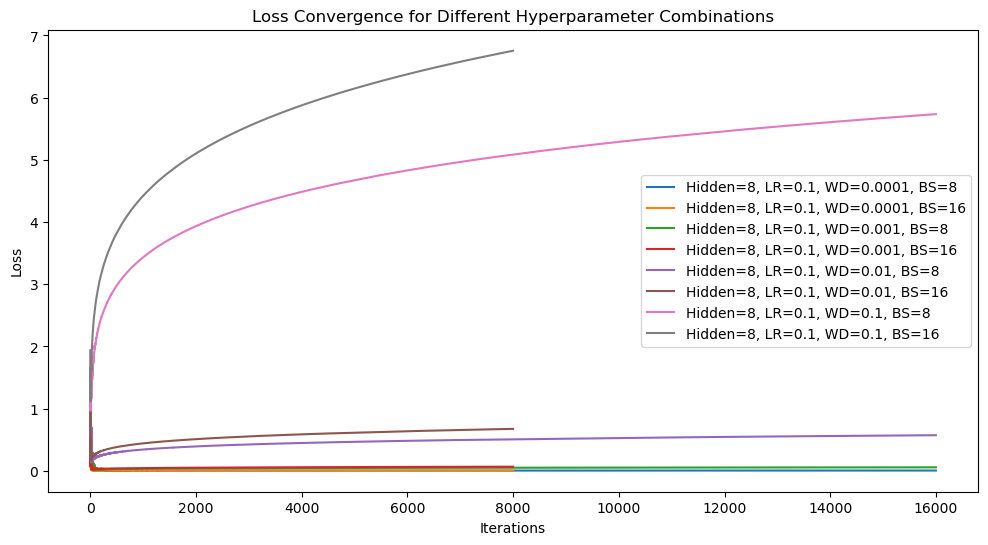

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [8]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # Tanh activation function and its derivative
                def tanh(x):
                    return np.tanh(x)

                def tanh_derivative(x):
                    return 1 - np.tanh(x)**2

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = tanh(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * tanh_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = tanh(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hidden Layer Size = 16

Hidden Layer Size: 16, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0028
Epoch 200/1000, Loss: 0.0027
Epoch 300/1000, Loss: 0.0028
Epoch 400/1000, Loss: 0.0030
Epoch 500/1000, Loss: 0.0030
Epoch 600/1000, Loss: 0.0030
Epoch 700/1000, Loss: 0.0031
Epoch 800/1000, Loss: 0.0031
Epoch 900/1000, Loss: 0.0031
Epoch 1000/1000, Loss: 0.0031
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 16, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0029
Epoch 200/1000, Loss: 0.0029
Epoch 300/1000, Loss: 0.0031
Epoch 400/1000, Loss: 0.0031
Epoch 500/1000, Loss: 0.0031
Epoch 600/1000, Loss: 0.0032
Epoch 700/1000, Loss: 0.0032
Epoch 800/1000, Loss: 0.0033
Epoch 900/1000, Loss: 0.0033
Epoch 1000/1000, Loss: 0.0033
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 16, Learning Rate: 0.1, Weight D

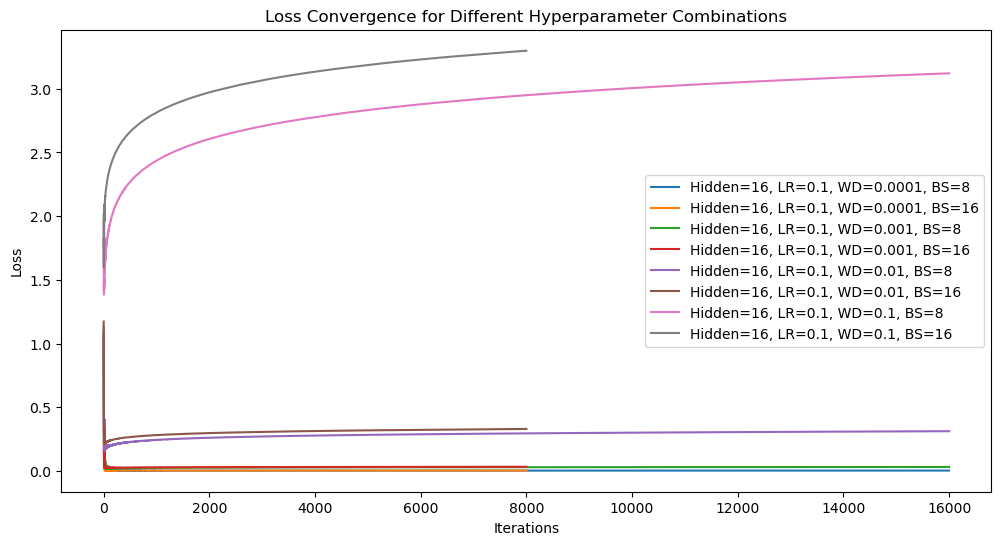

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [16]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hidden Layer Size: 16, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0036
Epoch 200/1000, Loss: 0.0035
Epoch 300/1000, Loss: 0.0036
Epoch 400/1000, Loss: 0.0039
Epoch 500/1000, Loss: 0.0039
Epoch 600/1000, Loss: 0.0040
Epoch 700/1000, Loss: 0.0041
Epoch 800/1000, Loss: 0.0041
Epoch 900/1000, Loss: 0.0042
Epoch 1000/1000, Loss: 0.0042
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 16, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0036
Epoch 200/1000, Loss: 0.0036
Epoch 300/1000, Loss: 0.0038
Epoch 400/1000, Loss: 0.0040
Epoch 500/1000, Loss: 0.0040
Epoch 600/1000, Loss: 0.0041
Epoch 700/1000, Loss: 0.0041
Epoch 800/1000, Loss: 0.0042
Epoch 900/1000, Loss: 0.0042
Epoch 1000/1000, Loss: 0.0043
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 16, Learning Rate: 0.1, Weight D

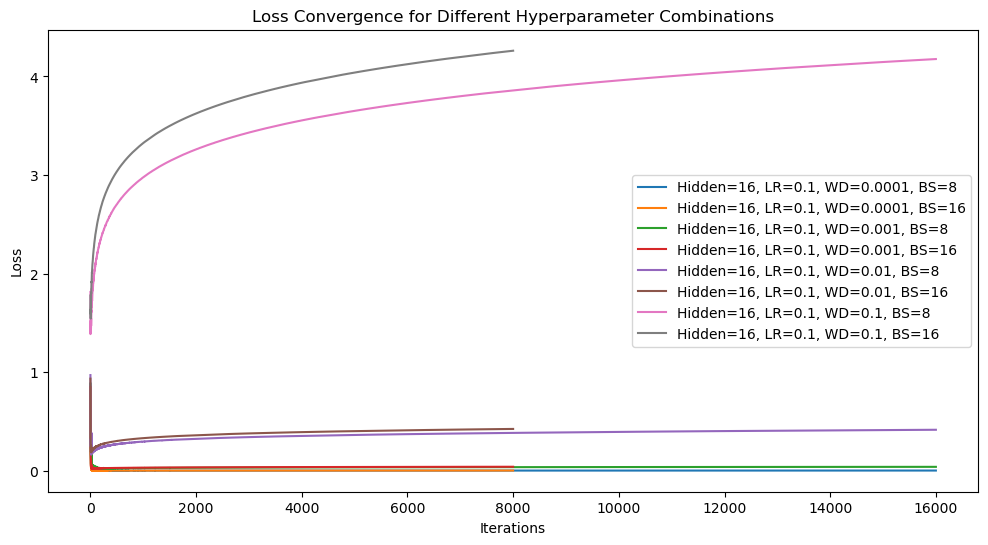

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [16]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # Tanh activation function and its derivative
                def tanh(x):
                    return np.tanh(x)

                def tanh_derivative(x):
                    return 1 - np.tanh(x)**2

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = tanh(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * tanh_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = tanh(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hidden Layer Size = 32

Hidden Layer Size: 32, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0035
Epoch 200/1000, Loss: 0.0034
Epoch 300/1000, Loss: 0.0035
Epoch 400/1000, Loss: 0.0037
Epoch 500/1000, Loss: 0.0037
Epoch 600/1000, Loss: 0.0037
Epoch 700/1000, Loss: 0.0037
Epoch 800/1000, Loss: 0.0038
Epoch 900/1000, Loss: 0.0038
Epoch 1000/1000, Loss: 0.0038
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 32, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0039
Epoch 200/1000, Loss: 0.0040
Epoch 300/1000, Loss: 0.0041
Epoch 400/1000, Loss: 0.0041
Epoch 500/1000, Loss: 0.0042
Epoch 600/1000, Loss: 0.0042
Epoch 700/1000, Loss: 0.0042
Epoch 800/1000, Loss: 0.0043
Epoch 900/1000, Loss: 0.0043
Epoch 1000/1000, Loss: 0.0043
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 32, Learning Rate: 0.1, Weight D

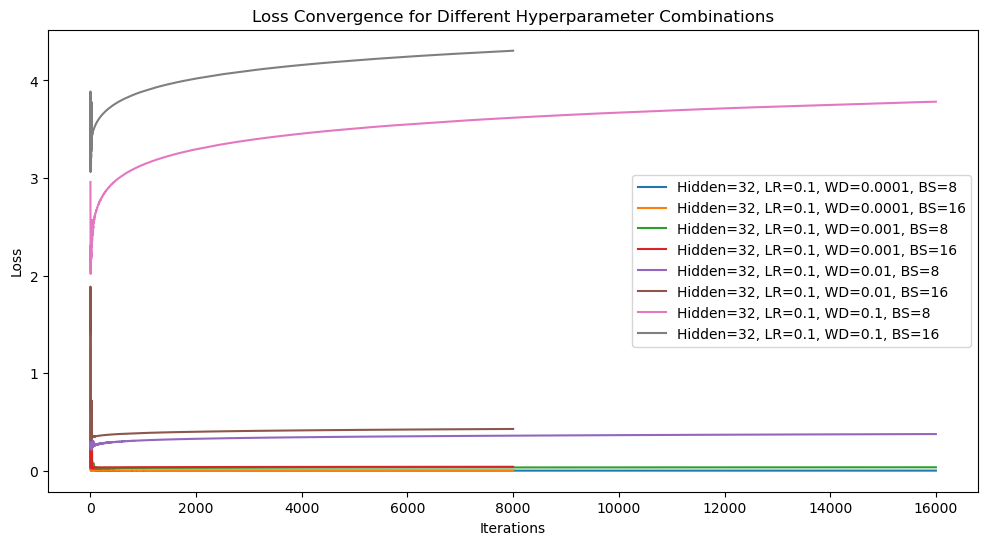

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [32]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hidden Layer Size: 32, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0037
Epoch 200/1000, Loss: 0.0037
Epoch 300/1000, Loss: 0.0038
Epoch 400/1000, Loss: 0.0040
Epoch 500/1000, Loss: 0.0040
Epoch 600/1000, Loss: 0.0040
Epoch 700/1000, Loss: 0.0041
Epoch 800/1000, Loss: 0.0041
Epoch 900/1000, Loss: 0.0041
Epoch 1000/1000, Loss: 0.0042
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 32, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0036
Epoch 200/1000, Loss: 0.0037
Epoch 300/1000, Loss: 0.0039
Epoch 400/1000, Loss: 0.0040
Epoch 500/1000, Loss: 0.0041
Epoch 600/1000, Loss: 0.0041
Epoch 700/1000, Loss: 0.0042
Epoch 800/1000, Loss: 0.0042
Epoch 900/1000, Loss: 0.0042
Epoch 1000/1000, Loss: 0.0043
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 32, Learning Rate: 0.1, Weight D

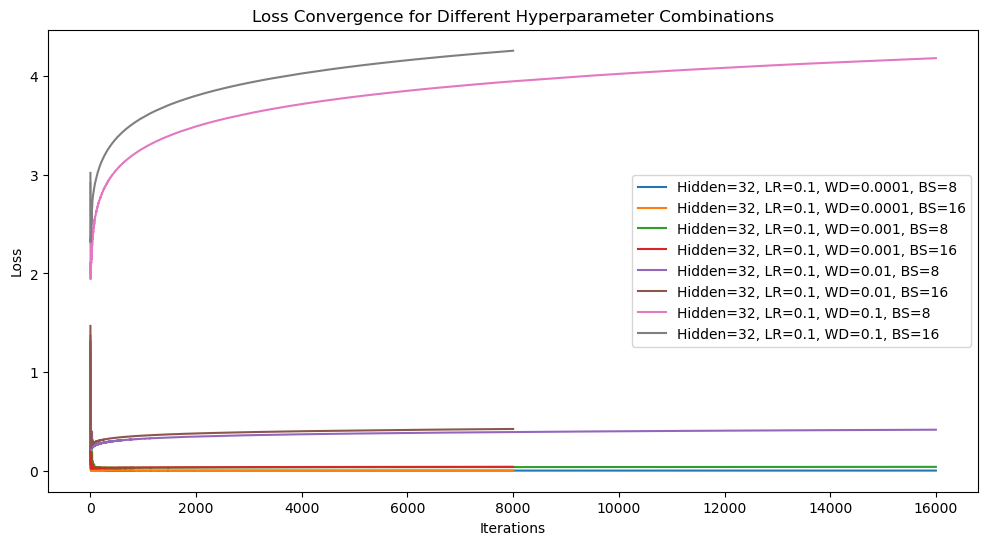

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [32]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # Tanh activation function and its derivative
                def tanh(x):
                    return np.tanh(x)

                def tanh_derivative(x):
                    return 1 - np.tanh(x)**2

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = tanh(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * tanh_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = tanh(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hidden Layer Size = 64

Hidden Layer Size: 64, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0052
Epoch 200/1000, Loss: 0.0051
Epoch 300/1000, Loss: 0.0051
Epoch 400/1000, Loss: 0.0052
Epoch 500/1000, Loss: 0.0052
Epoch 600/1000, Loss: 0.0053
Epoch 700/1000, Loss: 0.0053
Epoch 800/1000, Loss: 0.0054
Epoch 900/1000, Loss: 0.0054
Epoch 1000/1000, Loss: 0.0054
Test Accuracy: 1.0
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]] 

Hidden Layer Size: 64, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0115
Epoch 200/1000, Loss: 0.0115
Epoch 300/1000, Loss: 0.0115
Epoch 400/1000, Loss: 0.0116
Epoch 500/1000, Loss: 0.0116
Epoch 600/1000, Loss: 0.0116
Epoch 700/1000, Loss: 0.0116
Epoch 800/1000, Loss: 0.0116
Epoch 900/1000, Loss: 0.0116
Epoch 1000/1000, Loss: 0.0117
Test Accuracy: 1.0
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]] 

Hidden Layer Size: 64, Learning Rate: 0.1, Weight Decay: 0.001, Batch Size: 8
Epo

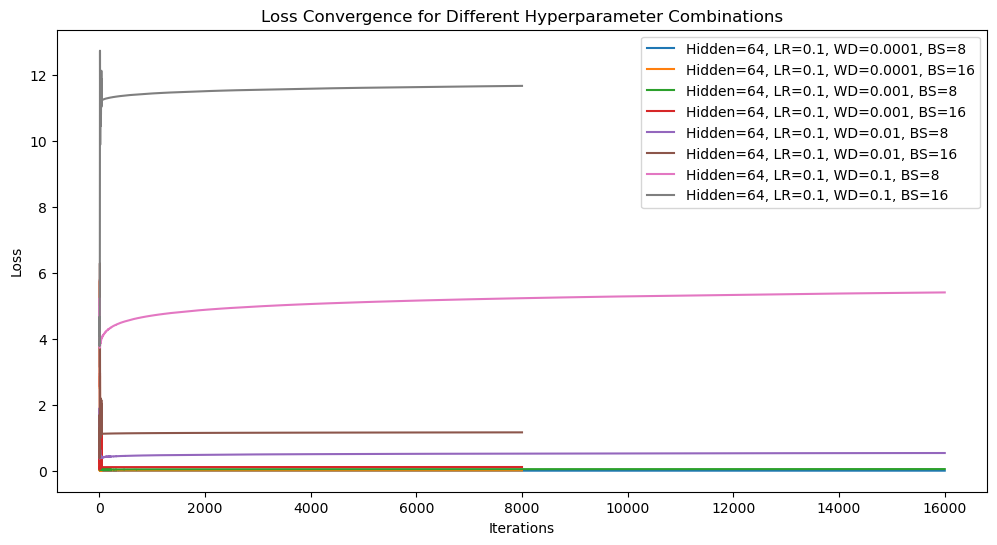

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [64]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hidden Layer Size: 64, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0051
Epoch 200/1000, Loss: 0.0051
Epoch 300/1000, Loss: 0.0051
Epoch 400/1000, Loss: 0.0052
Epoch 500/1000, Loss: 0.0053
Epoch 600/1000, Loss: 0.0054
Epoch 700/1000, Loss: 0.0054
Epoch 800/1000, Loss: 0.0054
Epoch 900/1000, Loss: 0.0054
Epoch 1000/1000, Loss: 0.0055
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 64, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0057
Epoch 200/1000, Loss: 0.0056
Epoch 300/1000, Loss: 0.0056
Epoch 400/1000, Loss: 0.0057
Epoch 500/1000, Loss: 0.0058
Epoch 600/1000, Loss: 0.0058
Epoch 700/1000, Loss: 0.0058
Epoch 800/1000, Loss: 0.0059
Epoch 900/1000, Loss: 0.0059
Epoch 1000/1000, Loss: 0.0059
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 64, Learning Rate: 0.1, Weight D

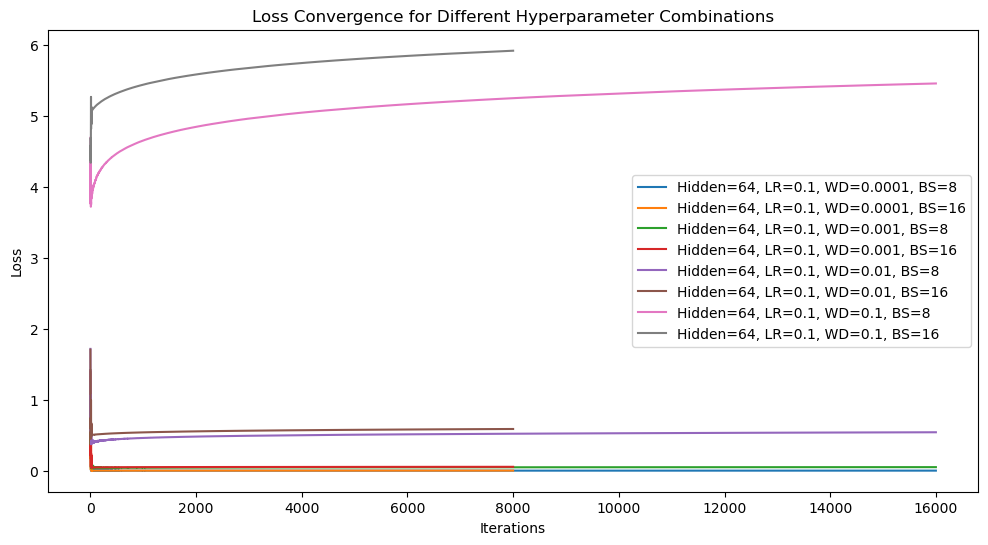

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [64]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # Tanh activation function and its derivative
                def tanh(x):
                    return np.tanh(x)

                def tanh_derivative(x):
                    return 1 - np.tanh(x)**2

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = tanh(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * tanh_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = tanh(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hidden Layer Size = 128

Hidden Layer Size: 128, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0083
Epoch 200/1000, Loss: 0.0084
Epoch 300/1000, Loss: 0.0084
Epoch 400/1000, Loss: 0.0085
Epoch 500/1000, Loss: 0.0085
Epoch 600/1000, Loss: 0.0086
Epoch 700/1000, Loss: 0.0086
Epoch 800/1000, Loss: 0.0086
Epoch 900/1000, Loss: 0.0086
Epoch 1000/1000, Loss: 0.0087
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 128, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0094
Epoch 200/1000, Loss: 0.0094
Epoch 300/1000, Loss: 0.0094
Epoch 400/1000, Loss: 0.0095
Epoch 500/1000, Loss: 0.0095
Epoch 600/1000, Loss: 0.0095
Epoch 700/1000, Loss: 0.0095
Epoch 800/1000, Loss: 0.0095
Epoch 900/1000, Loss: 0.0096
Epoch 1000/1000, Loss: 0.0096
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 1 20  0]
 [ 0  0 14]] 

Hidden Layer Size: 128, Learning Rate: 0.1, Weigh

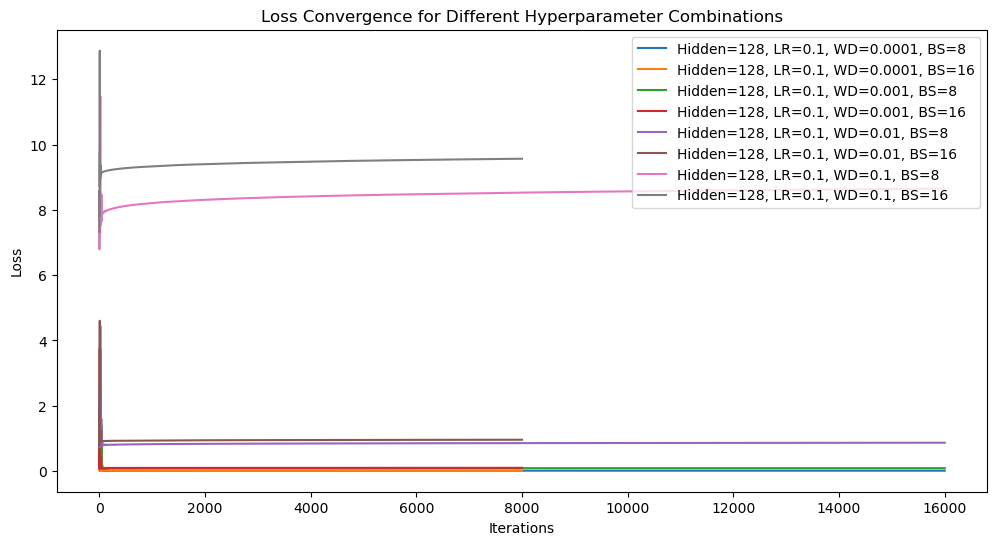

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [128]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hidden Layer Size: 128, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 8
Epoch 100/1000, Loss: 0.0080
Epoch 200/1000, Loss: 0.0078
Epoch 300/1000, Loss: 0.0078
Epoch 400/1000, Loss: 0.0079
Epoch 500/1000, Loss: 0.0079
Epoch 600/1000, Loss: 0.0079
Epoch 700/1000, Loss: 0.0080
Epoch 800/1000, Loss: 0.0080
Epoch 900/1000, Loss: 0.0080
Epoch 1000/1000, Loss: 0.0080
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 128, Learning Rate: 0.1, Weight Decay: 0.0001, Batch Size: 16
Epoch 100/1000, Loss: 0.0089
Epoch 200/1000, Loss: 0.0089
Epoch 300/1000, Loss: 0.0090
Epoch 400/1000, Loss: 0.0090
Epoch 500/1000, Loss: 0.0090
Epoch 600/1000, Loss: 0.0090
Epoch 700/1000, Loss: 0.0091
Epoch 800/1000, Loss: 0.0091
Epoch 900/1000, Loss: 0.0091
Epoch 1000/1000, Loss: 0.0091
Test Accuracy: 0.9814814814814815
Confusion Matrix on Test Set:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]] 

Hidden Layer Size: 128, Learning Rate: 0.1, Weigh

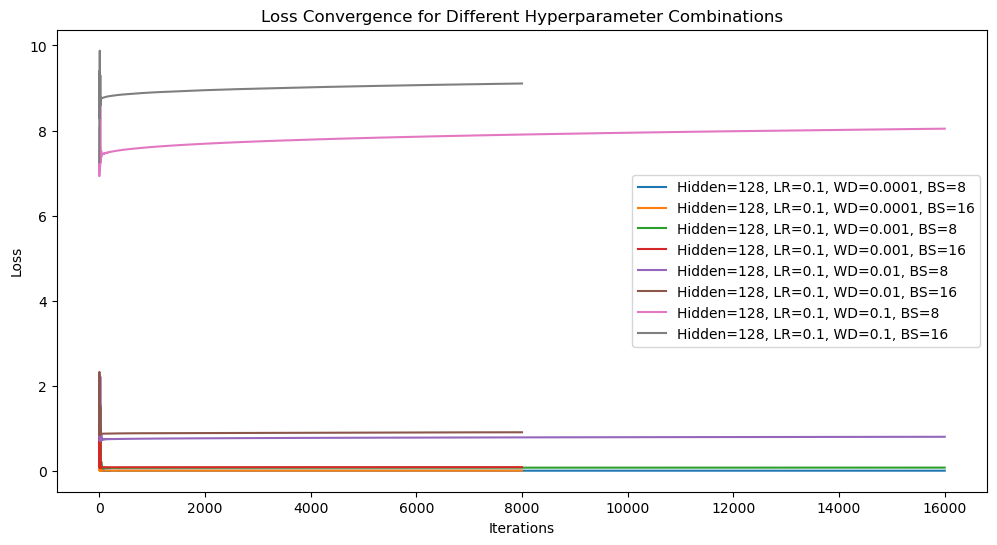

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [128]
learning_rates = [0.1]
weight_decays = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [8, 16]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # Tanh activation function and its derivative
                def tanh(x):
                    return np.tanh(x)

                def tanh_derivative(x):
                    return 1 - np.tanh(x)**2

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = tanh(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * tanh_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = tanh(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)
                print("Test Accuracy:", accuracy)
                print("Confusion Matrix on Test Set:\n", confusion, "\n")

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

    # Plot loss versus iterations for each combination of hyperparameters
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
        plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

    plt.title('Loss Convergence for Different Hyperparameter Combinations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Failed Test

Hidden Layer Size: 16, Learning Rate: 0.01, Weight Decay: 0.001, Batch Size: 8
Epoch 100/1000, Loss: 0.0227
Epoch 200/1000, Loss: 0.0217
Epoch 300/1000, Loss: 0.0227
Epoch 400/1000, Loss: 0.0251
Epoch 500/1000, Loss: 0.0248
Epoch 600/1000, Loss: 0.0247
Epoch 700/1000, Loss: 0.0253
Epoch 800/1000, Loss: 0.0255
Epoch 900/1000, Loss: 0.0257
Epoch 1000/1000, Loss: 0.0258
Hidden Layer Size: 16, Learning Rate: 0.01, Weight Decay: 0.001, Batch Size: 16
Epoch 100/1000, Loss: 0.0232
Epoch 200/1000, Loss: 0.0221
Epoch 300/1000, Loss: 0.0234
Epoch 400/1000, Loss: 0.0247
Epoch 500/1000, Loss: 0.0244
Epoch 600/1000, Loss: 0.0249
Epoch 700/1000, Loss: 0.0251
Epoch 800/1000, Loss: 0.0254
Epoch 900/1000, Loss: 0.0256
Epoch 1000/1000, Loss: 0.0260
Hidden Layer Size: 16, Learning Rate: 0.01, Weight Decay: 0.001, Batch Size: 32
Epoch 100/1000, Loss: 0.0218
Epoch 200/1000, Loss: 0.0222
Epoch 300/1000, Loss: 0.0235
Epoch 400/1000, Loss: 0.0241
Epoch 500/1000, Loss: 0.0243
Epoch 600/1000, Loss: 0.0248
Epoch

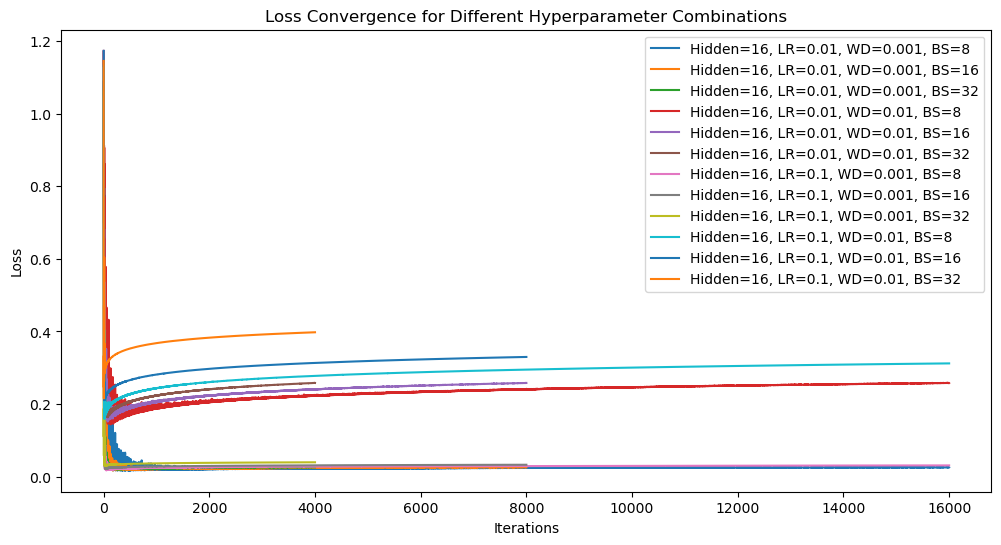

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters to test
# hidden_sizes = [16, 32, 64]
hidden_sizes = [16]
learning_rates = [0.01, 0.1]
weight_decays = [0.001, 0.01]
batch_sizes = [8, 16, 32]
epochs = 1000

results = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decays:
            for batch_size in batch_sizes:
                print(f"Hidden Layer Size: {hidden_size}, Learning Rate: {learning_rate}, Weight Decay: {weight_decay}, Batch Size: {batch_size}")
                # Initialize weights and biases
                np.random.seed(0)
                input_size = X_train.shape[1]
                output_size = len(np.unique(y_train))
                weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
                bias_hidden = np.zeros((1, hidden_size))
                weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
                bias_output = np.zeros((1, output_size))

                # ReLU activation function and its derivative
                def relu(x):
                    return np.maximum(0, x)

                def relu_derivative(x):
                    return np.where(x > 0, 1, 0)

                # Training loop
                loss_history = []
                for epoch in range(epochs):
                    # Shuffle the data
                    indices = np.arange(len(X_train))
                    np.random.shuffle(indices)
                    X_train_shuffled = X_train[indices]
                    y_train_shuffled = y_train[indices]

                    # Mini-batch training
                    for batch_start in range(0, len(X_train), batch_size):
                        batch_end = batch_start + batch_size
                        X_batch = X_train_shuffled[batch_start:batch_end]
                        y_batch = y_train_shuffled[batch_start:batch_end]

                        # Forward pass
                        hidden_input = np.dot(X_batch, weights_input_hidden) + bias_hidden
                        hidden_output = relu(hidden_input)
                        output = np.dot(hidden_output, weights_hidden_output) + bias_output

                        # Softmax activation for multi-class classification
                        exp_output = np.exp(output)
                        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                        # Calculate loss (cross-entropy)
                        m = len(y_batch)
                        loss = -np.log(predicted_output[range(m), y_batch])
                        loss = np.mean(loss)

                        l2_regularization = 0.5 * weight_decay * (
                            np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2)
                        )

                        # Total loss with regularization
                        total_loss = loss + l2_regularization
                        loss_history.append(total_loss)

                        # Backpropagation
                        delta_output = predicted_output
                        delta_output[range(m), y_batch] -= 1
                        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_output)

                        # Update weights and biases
                        weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
                        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
                        weights_input_hidden -= X_batch.T.dot(delta_hidden) * learning_rate
                        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

                    if (epoch + 1) % 100 == 0:
                        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

                # Calculate final accuracy on the test set
                hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
                hidden_output = relu(hidden_input)
                output = np.dot(hidden_output, weights_hidden_output) + bias_output

                # Softmax activation for multi-class classification
                exp_output = np.exp(output)
                predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

                predicted_labels = np.argmax(predicted_output, axis=1)
                accuracy = accuracy_score(y_test, predicted_labels)
                confusion = confusion_matrix(y_test, predicted_labels)

                results.append(
                    {
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'weight_decay': weight_decay,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'confusion_matrix': confusion,
                        'loss_history': loss_history
                    }
                )

# Plot loss versus iterations for each combination of hyperparameters
plt.figure(figsize=(12, 6))
for result in results:
    label = f"Hidden={result['hidden_size']}, LR={result['learning_rate']}, WD={result['weight_decay']}, BS={result['batch_size']}"
    plt.plot(range(len(result['loss_history'])), result['loss_history'], label=label)

plt.title('Loss Convergence for Different Hyperparameter Combinations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Testing Different Numbers of Layers

Epoch 10/1000, Loss: 0.0245
Epoch 20/1000, Loss: 0.0050
Epoch 30/1000, Loss: 0.0075
Epoch 40/1000, Loss: 0.0063
Epoch 50/1000, Loss: 0.0064
Early stopping: No improvement in validation loss for 20 epochs.


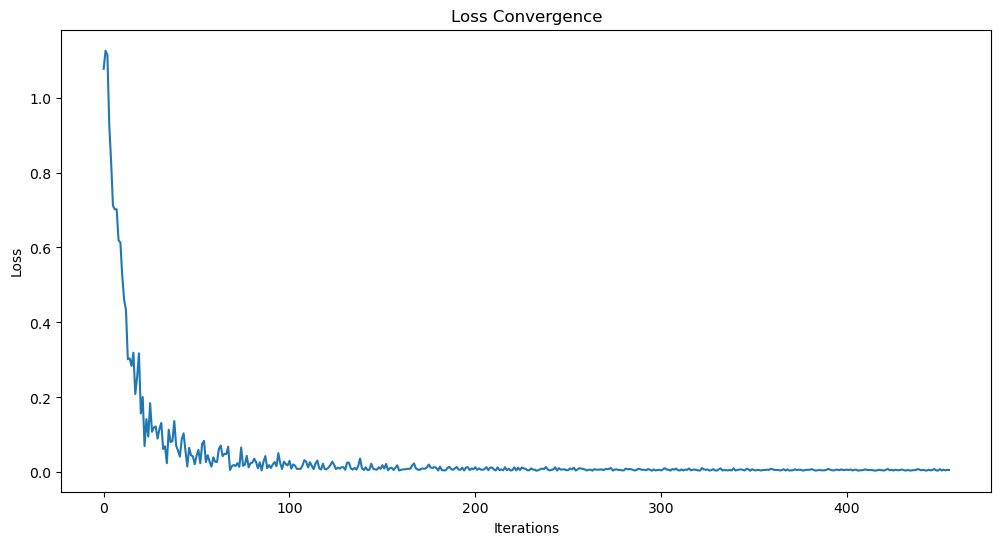

Final Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
hidden_sizes = [32, 16]  # List of hidden layer sizes
learning_rate = 0.01
weight_decay = 0.001
batch_size = 16
epochs = 1000
early_stopping_patience = 20  # Number of epochs with no improvement before stopping

# Initialize weights and biases for multiple hidden layers
np.random.seed(0)
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
num_hidden_layers = len(hidden_sizes)

weights_hidden_layers = []
bias_hidden_layers = []

for layer_size in hidden_sizes:
    weights_hidden = np.random.randn(input_size, layer_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, layer_size))
    weights_hidden_layers.append(weights_hidden)
    bias_hidden_layers.append(bias_hidden)
    input_size = layer_size

weights_output = np.random.randn(input_size, output_size) / np.sqrt(input_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop with early stopping
best_loss = float('inf')
no_improvement_count = 0
loss_history = []

for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass through hidden layers
        hidden_outputs = [X_batch]
        for i in range(num_hidden_layers):
            hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
            hidden_output = relu(hidden_input)
            hidden_outputs.append(hidden_output)

        # Forward pass to output layer
        output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output_input)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (
            np.sum(weights_output ** 2)
        )

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation for output layer
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1

        # Backpropagation through hidden layers
        delta_hidden_layers = []
        delta_hidden = delta_output.dot(weights_output.T) * relu_derivative(hidden_outputs[-1])
        delta_hidden_layers.append(delta_hidden)

        for i in range(num_hidden_layers - 1, 0, -1):
            delta_hidden = delta_hidden_layers[-1].dot(weights_hidden_layers[i].T) * relu_derivative(hidden_outputs[i])
            delta_hidden_layers.append(delta_hidden)

        # Update weights and biases for output layer
        weights_output -= hidden_outputs[-1].T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for hidden layers
        for i in range(num_hidden_layers):
            weights_hidden_layers[i] -= hidden_outputs[i].T.dot(delta_hidden_layers[num_hidden_layers - 1 - i]) * learning_rate
            bias_hidden_layers[i] -= np.sum(delta_hidden_layers[num_hidden_layers - 1 - i], axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    # Early stopping check
    if total_loss < best_loss:
        best_loss = total_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
        break

# Calculate final accuracy on the test set
hidden_outputs = [X_test]
for i in range(num_hidden_layers):
    hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
    hidden_output = relu(hidden_input)
    hidden_outputs.append(hidden_output)

output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output_input)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print("Final Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(confusion)

Epoch 10/1000, Loss: 0.0092
Epoch 20/1000, Loss: 0.0113
Epoch 30/1000, Loss: 0.0073
Epoch 40/1000, Loss: 0.0054
Epoch 50/1000, Loss: 0.0035
Epoch 60/1000, Loss: 0.0038
Epoch 70/1000, Loss: 0.0044
Early stopping: No improvement in validation loss for 20 epochs.


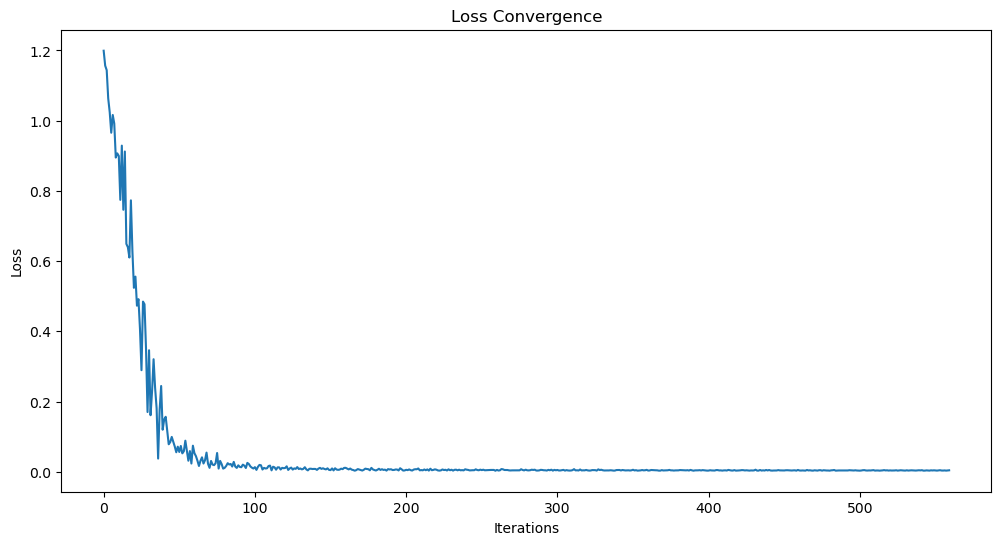

Final Accuracy: 0.9815
Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
hidden_sizes = [32, 16, 8]  # List of hidden layer sizes
learning_rate = 0.01
weight_decay = 0.001
batch_size = 16
epochs = 1000
early_stopping_patience = 20  # Number of epochs with no improvement before stopping

# Initialize weights and biases for multiple hidden layers
np.random.seed(0)
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
num_hidden_layers = len(hidden_sizes)

weights_hidden_layers = []
bias_hidden_layers = []

for layer_size in hidden_sizes:
    weights_hidden = np.random.randn(input_size, layer_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, layer_size))
    weights_hidden_layers.append(weights_hidden)
    bias_hidden_layers.append(bias_hidden)
    input_size = layer_size

weights_output = np.random.randn(input_size, output_size) / np.sqrt(input_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop with early stopping
best_loss = float('inf')
no_improvement_count = 0
loss_history = []

for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass through hidden layers
        hidden_outputs = [X_batch]
        for i in range(num_hidden_layers):
            hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
            hidden_output = relu(hidden_input)
            hidden_outputs.append(hidden_output)

        # Forward pass to output layer
        output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output_input)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (
            np.sum(weights_output ** 2)
        )

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation for output layer
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1

        # Backpropagation through hidden layers
        delta_hidden_layers = []
        delta_hidden = delta_output.dot(weights_output.T) * relu_derivative(hidden_outputs[-1])
        delta_hidden_layers.append(delta_hidden)

        for i in range(num_hidden_layers - 1, 0, -1):
            delta_hidden = delta_hidden_layers[-1].dot(weights_hidden_layers[i].T) * relu_derivative(hidden_outputs[i])
            delta_hidden_layers.append(delta_hidden)

        # Update weights and biases for output layer
        weights_output -= hidden_outputs[-1].T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for hidden layers
        for i in range(num_hidden_layers):
            weights_hidden_layers[i] -= hidden_outputs[i].T.dot(delta_hidden_layers[num_hidden_layers - 1 - i]) * learning_rate
            bias_hidden_layers[i] -= np.sum(delta_hidden_layers[num_hidden_layers - 1 - i], axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    # Early stopping check
    if total_loss < best_loss:
        best_loss = total_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
        break

# Calculate final accuracy on the test set
hidden_outputs = [X_test]
for i in range(num_hidden_layers):
    hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
    hidden_output = relu(hidden_input)
    hidden_outputs.append(hidden_output)

output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output_input)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print("Final Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(confusion)

Epoch 10/1000, Loss: 0.0129
Epoch 20/1000, Loss: 0.0041
Epoch 30/1000, Loss: 0.0053
Epoch 40/1000, Loss: 0.0041
Epoch 50/1000, Loss: 0.0042
Epoch 60/1000, Loss: 0.0039
Epoch 70/1000, Loss: 0.0043
Epoch 80/1000, Loss: 0.0038
Early stopping: No improvement in validation loss for 20 epochs.


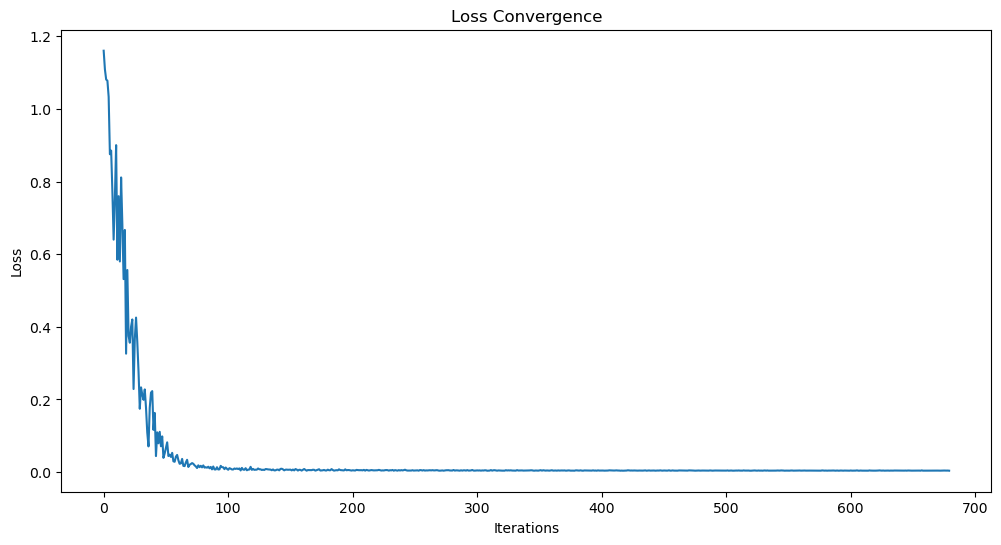

Final Accuracy: 0.9815
Confusion Matrix:
[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
hidden_sizes = [64, 32, 16, 8]  # List of hidden layer sizes
learning_rate = 0.01
weight_decay = 0.001
batch_size = 16
epochs = 1000
early_stopping_patience = 20  # Number of epochs with no improvement before stopping

# Initialize weights and biases for multiple hidden layers
np.random.seed(0)
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
num_hidden_layers = len(hidden_sizes)

weights_hidden_layers = []
bias_hidden_layers = []

for layer_size in hidden_sizes:
    weights_hidden = np.random.randn(input_size, layer_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, layer_size))
    weights_hidden_layers.append(weights_hidden)
    bias_hidden_layers.append(bias_hidden)
    input_size = layer_size

weights_output = np.random.randn(input_size, output_size) / np.sqrt(input_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop with early stopping
best_loss = float('inf')
no_improvement_count = 0
loss_history = []

for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass through hidden layers
        hidden_outputs = [X_batch]
        for i in range(num_hidden_layers):
            hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
            hidden_output = relu(hidden_input)
            hidden_outputs.append(hidden_output)

        # Forward pass to output layer
        output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output_input)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (
            np.sum(weights_output ** 2)
        )

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation for output layer
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1

        # Backpropagation through hidden layers
        delta_hidden_layers = []
        delta_hidden = delta_output.dot(weights_output.T) * relu_derivative(hidden_outputs[-1])
        delta_hidden_layers.append(delta_hidden)

        for i in range(num_hidden_layers - 1, 0, -1):
            delta_hidden = delta_hidden_layers[-1].dot(weights_hidden_layers[i].T) * relu_derivative(hidden_outputs[i])
            delta_hidden_layers.append(delta_hidden)

        # Update weights and biases for output layer
        weights_output -= hidden_outputs[-1].T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for hidden layers
        for i in range(num_hidden_layers):
            weights_hidden_layers[i] -= hidden_outputs[i].T.dot(delta_hidden_layers[num_hidden_layers - 1 - i]) * learning_rate
            bias_hidden_layers[i] -= np.sum(delta_hidden_layers[num_hidden_layers - 1 - i], axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    # Early stopping check
    if total_loss < best_loss:
        best_loss = total_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
        break

# Calculate final accuracy on the test set
hidden_outputs = [X_test]
for i in range(num_hidden_layers):
    hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
    hidden_output = relu(hidden_input)
    hidden_outputs.append(hidden_output)

output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output_input)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print("Final Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(confusion)

Epoch 10/1000, Loss: 0.0065
Epoch 20/1000, Loss: 0.0036
Epoch 30/1000, Loss: 0.0037
Early stopping: No improvement in validation loss for 20 epochs.


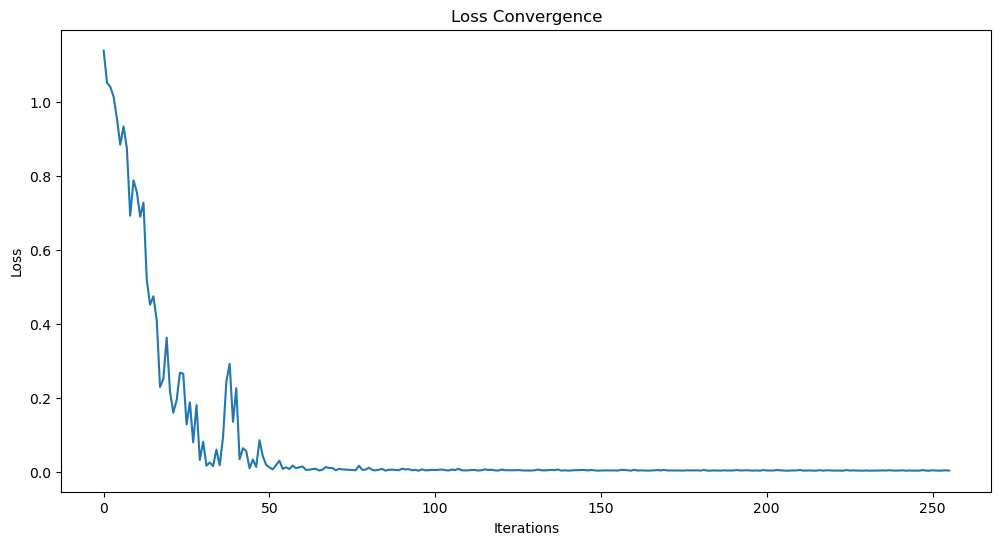

Final Accuracy: 0.9815
Confusion Matrix:
[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
hidden_sizes = [128, 64, 32, 16, 8]  # List of hidden layer sizes
learning_rate = 0.01
weight_decay = 0.001
batch_size = 16
epochs = 1000
early_stopping_patience = 20  # Number of epochs with no improvement before stopping

# Initialize weights and biases for multiple hidden layers
np.random.seed(0)
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
num_hidden_layers = len(hidden_sizes)

weights_hidden_layers = []
bias_hidden_layers = []

for layer_size in hidden_sizes:
    weights_hidden = np.random.randn(input_size, layer_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, layer_size))
    weights_hidden_layers.append(weights_hidden)
    bias_hidden_layers.append(bias_hidden)
    input_size = layer_size

weights_output = np.random.randn(input_size, output_size) / np.sqrt(input_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop with early stopping
best_loss = float('inf')
no_improvement_count = 0
loss_history = []

for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass through hidden layers
        hidden_outputs = [X_batch]
        for i in range(num_hidden_layers):
            hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
            hidden_output = relu(hidden_input)
            hidden_outputs.append(hidden_output)

        # Forward pass to output layer
        output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output_input)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (
            np.sum(weights_output ** 2)
        )

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation for output layer
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1

        # Backpropagation through hidden layers
        delta_hidden_layers = []
        delta_hidden = delta_output.dot(weights_output.T) * relu_derivative(hidden_outputs[-1])
        delta_hidden_layers.append(delta_hidden)

        for i in range(num_hidden_layers - 1, 0, -1):
            delta_hidden = delta_hidden_layers[-1].dot(weights_hidden_layers[i].T) * relu_derivative(hidden_outputs[i])
            delta_hidden_layers.append(delta_hidden)

        # Update weights and biases for output layer
        weights_output -= hidden_outputs[-1].T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for hidden layers
        for i in range(num_hidden_layers):
            weights_hidden_layers[i] -= hidden_outputs[i].T.dot(delta_hidden_layers[num_hidden_layers - 1 - i]) * learning_rate
            bias_hidden_layers[i] -= np.sum(delta_hidden_layers[num_hidden_layers - 1 - i], axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    # Early stopping check
    if total_loss < best_loss:
        best_loss = total_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
        break

# Calculate final accuracy on the test set
hidden_outputs = [X_test]
for i in range(num_hidden_layers):
    hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
    hidden_output = relu(hidden_input)
    hidden_outputs.append(hidden_output)

output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output_input)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print("Final Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(confusion)

Epoch 10/1000, Loss: 0.3481
Epoch 20/1000, Loss: 0.0267
Epoch 30/1000, Loss: 0.0282
Epoch 40/1000, Loss: 0.0158
Epoch 50/1000, Loss: 0.0138
Epoch 60/1000, Loss: 0.0152
Epoch 70/1000, Loss: 0.0091
Epoch 80/1000, Loss: 0.0093
Epoch 90/1000, Loss: 0.0062
Epoch 100/1000, Loss: 0.0051
Epoch 110/1000, Loss: 0.0052
Epoch 120/1000, Loss: 0.0063
Early stopping: No improvement in validation loss for 20 epochs.


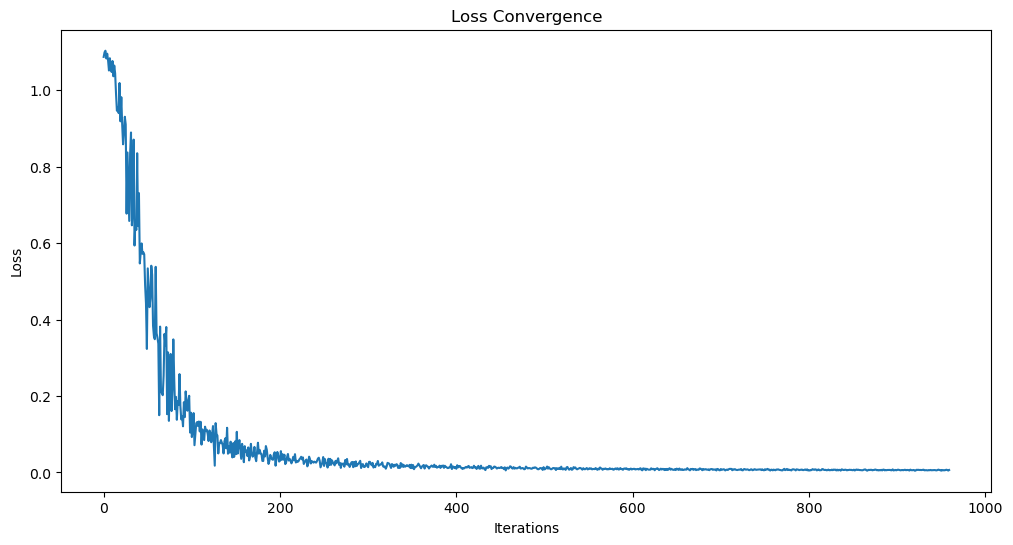

Final Accuracy: 0.9815
Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Recognition Dataset
wine_data = load_wine()
X = wine_data.data  # Feature data
y = wine_data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
hidden_sizes = [16, 8, 4]  # List of hidden layer sizes
learning_rate = 0.01
weight_decay = 0.001
batch_size = 16
epochs = 1000
early_stopping_patience = 20  # Number of epochs with no improvement before stopping

# Initialize weights and biases for multiple hidden layers
np.random.seed(0)
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
num_hidden_layers = len(hidden_sizes)

weights_hidden_layers = []
bias_hidden_layers = []

for layer_size in hidden_sizes:
    weights_hidden = np.random.randn(input_size, layer_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, layer_size))
    weights_hidden_layers.append(weights_hidden)
    bias_hidden_layers.append(bias_hidden)
    input_size = layer_size

weights_output = np.random.randn(input_size, output_size) / np.sqrt(input_size)
bias_output = np.zeros((1, output_size))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop with early stopping
best_loss = float('inf')
no_improvement_count = 0
loss_history = []

for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Forward pass through hidden layers
        hidden_outputs = [X_batch]
        for i in range(num_hidden_layers):
            hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
            hidden_output = relu(hidden_input)
            hidden_outputs.append(hidden_output)

        # Forward pass to output layer
        output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

        # Softmax activation for multi-class classification
        exp_output = np.exp(output_input)
        predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

        # Calculate loss (cross-entropy)
        m = len(y_batch)
        loss = -np.log(predicted_output[range(m), y_batch])
        loss = np.mean(loss)

        l2_regularization = 0.5 * weight_decay * (
            np.sum(weights_output ** 2)
        )

        # Total loss with regularization
        total_loss = loss + l2_regularization
        loss_history.append(total_loss)

        # Backpropagation for output layer
        delta_output = predicted_output
        delta_output[range(m), y_batch] -= 1

        # Backpropagation through hidden layers
        delta_hidden_layers = []
        delta_hidden = delta_output.dot(weights_output.T) * relu_derivative(hidden_outputs[-1])
        delta_hidden_layers.append(delta_hidden)

        for i in range(num_hidden_layers - 1, 0, -1):
            delta_hidden = delta_hidden_layers[-1].dot(weights_hidden_layers[i].T) * relu_derivative(hidden_outputs[i])
            delta_hidden_layers.append(delta_hidden)

        # Update weights and biases for output layer
        weights_output -= hidden_outputs[-1].T.dot(delta_output) * learning_rate
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for hidden layers
        for i in range(num_hidden_layers):
            weights_hidden_layers[i] -= hidden_outputs[i].T.dot(delta_hidden_layers[num_hidden_layers - 1 - i]) * learning_rate
            bias_hidden_layers[i] -= np.sum(delta_hidden_layers[num_hidden_layers - 1 - i], axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    # Early stopping check
    if total_loss < best_loss:
        best_loss = total_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_patience:
        print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
        break

# Calculate final accuracy on the test set
hidden_outputs = [X_test]
for i in range(num_hidden_layers):
    hidden_input = np.dot(hidden_outputs[i], weights_hidden_layers[i]) + bias_hidden_layers[i]
    hidden_output = relu(hidden_input)
    hidden_outputs.append(hidden_output)

output_input = np.dot(hidden_outputs[-1], weights_output) + bias_output

# Softmax activation for multi-class classification
exp_output = np.exp(output_input)
predicted_output = exp_output / np.sum(exp_output, axis=1, keepdims=True)

predicted_labels = np.argmax(predicted_output, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
confusion = confusion_matrix(y_test, predicted_labels)

# Plot loss versus iterations
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print("Final Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(confusion)